<a href="https://colab.research.google.com/github/financieras/pyCourse/blob/main/jupyter/calisto3/0290_opciones.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Valoración de opciones

## Modelo de valoración de opciones europeas mediante arbol binomial

In [1]:
# Estimación del precio de una opción por árboles binomiales
import numpy as np
from scipy.stats import binom

#Datos de entrada
tipo = input('Tipo de opción: 1 Call, 2 Put. Indique 1 o 2. ') or '1'
if tipo == '1':
    print('Tipo de la opción: CALL')
if tipo == '2':
    print('Tipo de la opción: PUT')

spot = float(input('Precio Spot del activo subyacente: ') or 100)
print('Precio spot=', spot)

strik = float(input('Precio de ejercicio: Strik: ') or 110)
print('strik=', strik)

anyos = float(input('Duración en años: ') or 2)
print('años=', anyos)

volatilidad = float(input('Volatilidad anual, por ejemplo 0.2: ') or 0.2)
print('Volatilidad=', volatilidad*100, '%')

n = int(input('Número de pasos del arbol binomial, por ejemplo 4: ') or 4)
print('Número de pasos del arbol binomial=', n)

tInt = float(input('Rentabilidad libre de riesgo. Por ejemplo para un 7% poner 0.07: ') or 0.07)
print('Tipo de interés=', tInt*100, '%')
r = np.log(1+tInt)   # r es el tanto instantáneo
print('Tanto instantáneo=', r*100, '%')
# log es el neperiano. Ejemplo np.log(np.e) es igua a 1

# Calculo de deltaT, u, d, p
deltaT = anyos / n
u = np.exp(volatilidad * np.sqrt(deltaT))
d = 1/u
p = (np.exp(r*deltaT)-d) / (u-d)
print('u=', u, 'p=', p, 'deltaT=', deltaT)

# Generación de los precios esperados del activo subyacente a fecha de vencimiento
Sn = [0]*(n+1)   # Sn es la lista de precios del activo subyacene a fecha de vto.
for i in range(n+1):
    Sn[i] = spot * u**(n-i) * d**i
    #print('Sn(',i,')=', Sn[i])

# calculamos el payoff según sea un Call o un Put
payoff = [0]*(n+1)   # inicilizamos a cero la lista del payoff
for i in range(n+1):
    if tipo == '1':
        payoff[i] = max(0, Sn[i] - strik)
    if tipo == '2':
        payoff[i] = max(0, strik - Sn[i])
    #print('payoff(',i,')=',payoff[i])
    #print('binomial(',i,')=',binom.pmf(n-i, n, p))

# cálculo de la prima estimada
prima = 0
for i in range(n+1):
    prima += payoff[i] * binom.pmf(n-i, n, p)
prima *= np.exp(-r * anyos)   # descontamos a valor actual, hasta t=0
print('Prima estimada=', prima)

Tipo de opción: 1 Call, 2 Put. Indique 1 o 2. 
Tipo de la opción: CALL
Precio Spot del activo subyacente: 
Precio spot= 100.0
Precio de ejercicio: Strik: 
strik= 110.0
Duración en años: 
años= 2.0
Volatilidad anual, por ejemplo 0.2: 
Volatilidad= 20.0 %
Número de pasos del arbol binomial, por ejemplo 4: 
Número de pasos del arbol binomial= 4
Rentabilidad libre de riesgo. Por ejemplo para un 7% poner 0.07: 
Tipo de interés= 7.000000000000001 %
Tanto instantáneo= 6.765864847381486 %
u= 1.151909910168909 p= 0.5859497140447129 deltaT= 0.5
Prima estimada= 13.405375176471251


# Modelo binomial usando una función

In [2]:
import numpy as np
from scipy.stats import binom

def prima(tipo,spot,strik,anyos,volatilidad,n,tInt):
    r = np.log(1 + tInt)   # r es el tanto instantáneo
    deltaT = anyos / n
    u = np.exp(volatilidad * np.sqrt(deltaT))
    d = 1/u
    p = (np.exp(r*deltaT)-d) / (u-d)
    Sn = [0]*(n+1)   # Sn es la lista de precios del activo subyacene a fecha de vto.
    payoff = [0]*(n+1)   # inicilizamos a cero la lista del payoff
    prima = 0
    for i in range(n+1):
        Sn[i] = spot * u**(n-i) * d**i
        if tipo.lower() == 'call':
            payoff[i] = max(0, Sn[i] - strik)
        if tipo.lower() == 'put':
            payoff[i] = max(0, strik - Sn[i])
        prima += payoff[i] * binom.pmf(n-i, n, p)
    prima *= np.exp(-r * anyos)   # descontamos a valor actual, hasta t=0
    return prima

m = 50   # Calcularemos el arbol desde 1 hasta m pasos
evolucion = [0]*m
for j in range(m): #se pone j+1 pq las listas empiezan en cero
    evolucion[j] = prima('call', 100, 110, 2, 0.2, j+1, 0.07)
    print('prima(', j+1, ')=', evolucion[j])

print(prima('Put', 100, 105, 7/12, 0.4, 5, np.exp(0.08)-1))

prima( 1 )= 13.526244372788291
prima( 2 )= 13.326007505361297
prima( 3 )= 12.955004108763406
prima( 4 )= 13.405375176471251
prima( 5 )= 12.78689272561606
prima( 6 )= 13.360760111814571
prima( 7 )= 12.711196366441035
prima( 8 )= 13.308719736990831
prima( 9 )= 12.694142728070299
prima( 10 )= 13.262106777562405
prima( 11 )= 12.867200775539475
prima( 12 )= 13.221912122698052
prima( 13 )= 12.971001805772818
prima( 14 )= 13.18728832056382
prima( 15 )= 13.036320087551864
prima( 16 )= 13.15723342031321
prima( 17 )= 13.078599277371447
prima( 18 )= 13.130895229889312
prima( 19 )= 13.106312361652456
prima( 20 )= 13.107597578910795
prima( 21 )= 13.124428586509135
prima( 22 )= 13.086811822664233
prima( 23 )= 13.136017205486176
prima( 24 )= 13.068123634429512
prima( 25 )= 13.143053892795415
prima( 26 )= 13.05120549290042
prima( 27 )= 13.146853897230622
prima( 28 )= 13.035795740872219
prima( 29 )= 13.148317519585179
prima( 30 )= 13.021683036545436
prima( 31 )= 13.148075554812609
prima( 32 )= 13.00869

## Arbol binomial gráfico

Prima(1)= 7.503280463730395
Prima(2)= 7.998067941750737
Prima(200)= 7.5563068050873845


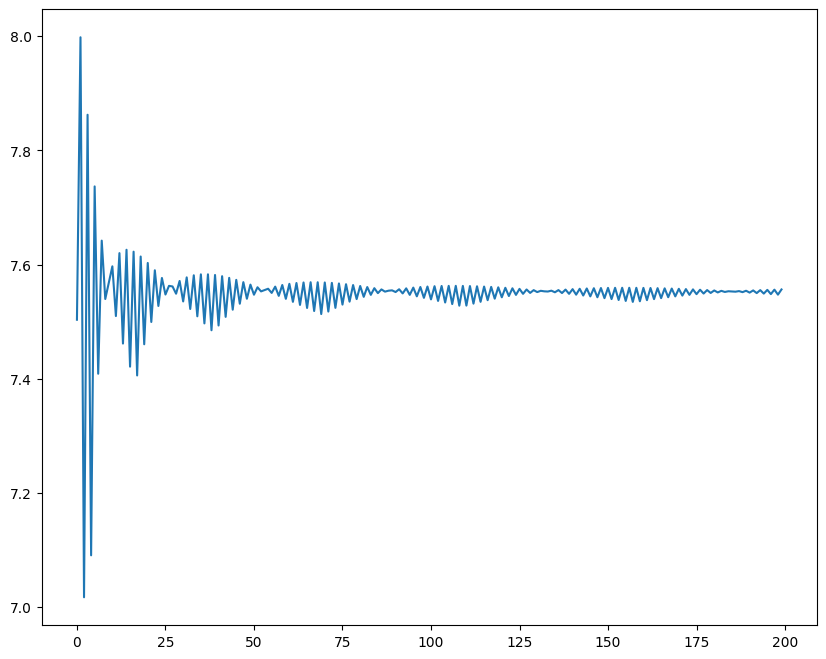

In [3]:
import numpy as np
from scipy.stats import binom
import matplotlib as mpl
import matplotlib.pyplot as plt

def prima(tipo, spot, strik, anyos, volatilidad, n, tInt):
    r = np.log(1+tInt)   # r es el tanto instantáneo
    deltaT = anyos / n
    u = np.exp(volatilidad * np.sqrt(deltaT))
    d = 1/u
    p = (np.exp(r*deltaT)-d) / (u-d)
    Sn = [0]*(n+1)   # Sn es la lista de precios del activo subyacene a fecha de vto.
    payoff = [0]*(n+1)   # inicilizamos a cero la lista del payoff
    prima = 0
    for i in range(n+1):
        Sn[i] = spot * u**(n-i) * d**i
        if tipo.lower() == 'call':
            payoff[i] = max(0, Sn[i] - strik)
        if tipo.lower() == 'put':
            payoff[i] = max(0, strik - Sn[i])
        prima += payoff[i] * binom.pmf(n-i, n, p)
    prima *= np.exp(-r * anyos)   # descontamos a valor actual, hasta t=0
    return prima

m = 200   # Calcularemos el arbol desde 1 hasta m pasos
evolucion = [0]*(m)
for j in range(m):
    evolucion[j] = prima('call', 100, 110, 1, 0.2, j+1, 0.09)

fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111)
last = 1
bound = m
ax.plot(evolucion)
fig.savefig('graph.png')
print('Prima(1)=', evolucion[0])
print('Prima(2)=', evolucion[1])
print('Prima('+str(m)+')=', evolucion[m-1])